In [108]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from ydata_profiling import ProfileReport

In [109]:
df=pd.read_excel("Customer churn & Retention Rate.xlsx")
df

,Customer_ID,Plan_Type,Monthly_Fee,Tenure_Months,Churn_Flag,Last_Active_Date,Age,Gender,Region,Customer_Segment,Avg_Monthly_Usage,Complaints,Support_Tickets
0,1001,Standard,799,39,0,2023-01-01,56,Female,North,Individual,88,0,3
1,1002,Basic,499,3,1,2023-01-02,46,Male,South,Individual,67,0,3
2,1003,Standard,1299,32,0,2023-01-03,32,Female,North,Individual,35,1,1
3,1004,Standard,1299,10,0,2023-01-04,60,Male,South,Individual,235,2,3
4,1005,Basic,1299,10,1,2023-01-05,25,Male,East,Individual,294,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1196,Basic,799,12,0,2023-07-15,49,Female,West,Business,238,1,4
196,1197,Premium,1299,16,0,2023-07-16,49,Male,South,Individual,270,1,1
197,1198,Standard,1299,24,0,2023-07-17,41,Female,South,Individual,173,1,2
198,1199,Basic,499,19,0,2023-07-18,58,Female,West,Individual,296,1,3


In [259]:
profile=ProfileReport(df,title="EDA Report",explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 175.56it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        200 non-null    int64         
 1   Plan_Type          200 non-null    object        
 2   Monthly_Fee        200 non-null    int64         
 3   Tenure_Months      200 non-null    int64         
 4   Churn_Flag         200 non-null    int64         
 5   Last_Active_Date   200 non-null    datetime64[ns]
 6   Age                200 non-null    int64         
 7   Gender             200 non-null    object        
 8   Region             200 non-null    object        
 9   Customer_Segment   200 non-null    object        
 10  Avg_Monthly_Usage  200 non-null    int64         
 11  Complaints         200 non-null    int64         
 12  Support_Tickets    200 non-null    int64         
 13  Year               200 non-null    int32         
 14  Months    

In [233]:
df["Year"]=df["Last_Active_Date"].dt.year

In [234]:
df["Months"]=df["Last_Active_Date"].dt.month

In [235]:
df["Months"].value_counts()

Months
1    31
3    31
5    31
4    30
6    30
2    28
7    19
Name: count, dtype: int64

In [236]:
df

,Customer_ID,Plan_Type,Monthly_Fee,Tenure_Months,Churn_Flag,Last_Active_Date,Age,Gender,Region,Customer_Segment,Avg_Monthly_Usage,Complaints,Support_Tickets,Year,Months,Churn_Status
0,1001,Standard,799,39,0,2023-01-01,56,Female,North,Individual,88,0,3,2023,1,Active
1,1002,Basic,499,3,1,2023-01-02,46,Male,South,Individual,67,0,3,2023,1,Churned
2,1003,Standard,1299,32,0,2023-01-03,32,Female,North,Individual,35,1,1,2023,1,Active
3,1004,Standard,1299,10,0,2023-01-04,60,Male,South,Individual,235,2,3,2023,1,Active
4,1005,Basic,1299,10,1,2023-01-05,25,Male,East,Individual,294,2,1,2023,1,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1196,Basic,799,12,0,2023-07-15,49,Female,West,Business,238,1,4,2023,7,Active
196,1197,Premium,1299,16,0,2023-07-16,49,Male,South,Individual,270,1,1,2023,7,Active
197,1198,Standard,1299,24,0,2023-07-17,41,Female,South,Individual,173,1,2,2023,7,Active
198,1199,Basic,499,19,0,2023-07-18,58,Female,West,Individual,296,1,3,2023,7,Active


In [237]:
df["Churn_Status"]=df["Churn_Flag"].apply(lambda x:"Churned" if x==1 else "Active")

In [238]:
df["Churn_Status"]

0       Active
1      Churned
2       Active
3       Active
4      Churned
        ...   
195     Active
196     Active
197     Active
198     Active
199    Churned
Name: Churn_Status, Length: 200, dtype: object

In [239]:
df

,Customer_ID,Plan_Type,Monthly_Fee,Tenure_Months,Churn_Flag,Last_Active_Date,Age,Gender,Region,Customer_Segment,Avg_Monthly_Usage,Complaints,Support_Tickets,Year,Months,Churn_Status
0,1001,Standard,799,39,0,2023-01-01,56,Female,North,Individual,88,0,3,2023,1,Active
1,1002,Basic,499,3,1,2023-01-02,46,Male,South,Individual,67,0,3,2023,1,Churned
2,1003,Standard,1299,32,0,2023-01-03,32,Female,North,Individual,35,1,1,2023,1,Active
3,1004,Standard,1299,10,0,2023-01-04,60,Male,South,Individual,235,2,3,2023,1,Active
4,1005,Basic,1299,10,1,2023-01-05,25,Male,East,Individual,294,2,1,2023,1,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1196,Basic,799,12,0,2023-07-15,49,Female,West,Business,238,1,4,2023,7,Active
196,1197,Premium,1299,16,0,2023-07-16,49,Male,South,Individual,270,1,1,2023,7,Active
197,1198,Standard,1299,24,0,2023-07-17,41,Female,South,Individual,173,1,2,2023,7,Active
198,1199,Basic,499,19,0,2023-07-18,58,Female,West,Individual,296,1,3,2023,7,Active


KPI calculations:

In [240]:
#Churn Rate
total_customers=df["Customer_ID"].nunique()
total_customers

200

In [241]:
churned_customers=df[df["Churn_Flag"]==1]["Customer_ID"].nunique()
churned_customers

53

In [242]:
churn_rate=(churned_customers/total_customers)*100
print("Churn_rate %:",round(churn_rate,2))

Churn_rate %: 26.5


In [243]:
#Revenue at Risk(Lost Revenue)
revenue_lost=df[df["Churn_Flag"]==1]["Monthly_Fee"].sum()
print("Revenue lost due to churn:",revenue_lost)

Revenue lost due to churn: 44147


In [244]:
#average Tenure Before Churn
avg_tenure_churn=df[df["Churn_Flag"]==1]["Tenure_Months"].mean()
print("Avg Tenure Before Churn:",round(avg_tenure_churn))

Avg Tenure Before Churn: 24


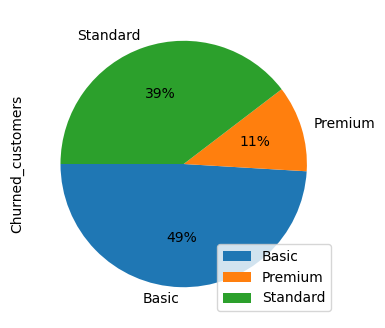

In [245]:
#Churn Analysis By Dimensions
plan_churn=df.groupby("Plan_Type").agg(Total_Customers=("Customer_ID", "count"),Churned_customers=("Churn_Flag","sum"))
plan_churn.plot(kind="pie",x="Plan_Type",y="Churned_customers",legend="Total_customers",autopct='%1.1i%%',figsize=(10,4),startangle=180)
plt.show()

In [246]:
plan_churn["Churn_Rate%"]=(plan_churn["Churned_customers"]/plan_churn["Total_Customers"])*100
plan_churn

,Total_Customers,Churned_customers,Churn_Rate%
Plan_Type,,,
Basic,94,26,27.659574
Premium,38,6,15.789474
Standard,68,21,30.882353


In [247]:
#Churn By Region
region_churn=df.groupby("Region").agg(Total_Customers=("Customer_ID", "count"),Churned_customers=("Churn_Flag","sum")).reset_index()
region_churn

,Region,Total_Customers,Churned_customers
0,East,43,8
1,North,51,11
2,South,56,22
3,West,50,12


In [248]:
region_churn["Churn_Rate%"]=(region_churn["Churned_customers"]/region_churn["Total_Customers"])*100
region_churn

,Region,Total_Customers,Churned_customers,Churn_Rate%
0,East,43,8,18.604651
1,North,51,11,21.568627
2,South,56,22,39.285714
3,West,50,12,24.000000


In [249]:
#Churn by Customer Segment
segment_churn=df.groupby("Customer_Segment").agg(Total_Customers=("Customer_ID", "count"),Churned_customers=("Churn_Flag","sum")).reset_index()
segment_churn

,Customer_Segment,Total_Customers,Churned_customers
0,Business,72,20
1,Individual,128,33


In [250]:
segment_churn["Churn_Rate%"]=(segment_churn["Churned_customers"]/segment_churn["Total_Customers"])*100
segment_churn

,Customer_Segment,Total_Customers,Churned_customers,Churn_Rate%
0,Business,72,20,27.777778
1,Individual,128,33,25.781250


Insight: Lower tenure --> higher churn


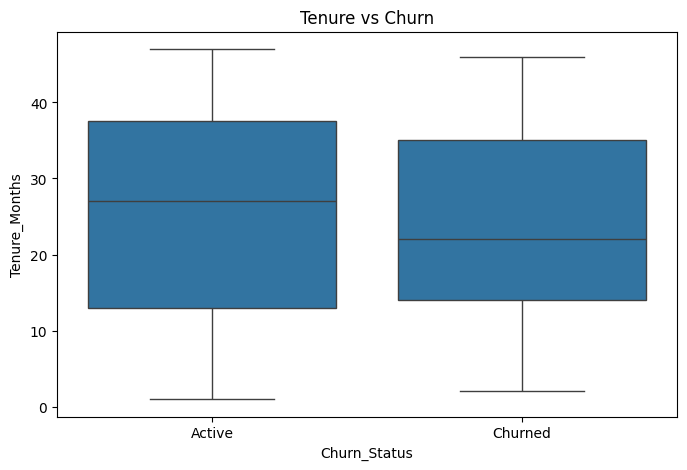

In [251]:
#Tenure vs Churn Analysis
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x="Churn_Status",y="Tenure_Months")
print("Insight: Lower tenure --> higher churn")
plt.title("Tenure vs Churn")
plt.show()

In [252]:
%matplotlib inline

In [253]:
#complaints & Support impact
complaint_churn=df.groupby("Churn_Status").agg(avg_complaints=("Complaints","mean")).reset_index()
print("Avg complaints:\n",complaint_churn)

Avg complaints:
   Churn_Status  avg_complaints
0       Active        1.442177
1      Churned        1.716981


In [254]:
ticket_churn=df.groupby("Churn_Status").agg(avg_support_tickets=("Support_Tickets","mean")).reset_index()
print("Avg Support Tickets:\n", ticket_churn)

Avg Support Tickets:
   Churn_Status  avg_support_tickets
0       Active             2.061224
1      Churned             2.037736


In [255]:
#statistical validation
from scipy.stats import ttest_ind, chi2_contingency

In [256]:
tenure_churned=df[df["Churn_Flag"]==1]["Tenure_Months"]
tenure_active=df[df["Churn_Flag"]==0]["Tenure_Months"]
t_stat,p_value = ttest_ind(tenure_churned, tenure_active, equal_var=False)
print("T-Statistic:",t_stat)
print("P-Value:",p_value)
print("By this i came to know that tenure alone was not a statistically significant factor for churn,suggesting ohter drivers like complaints or service quality may be more impactful") 

T-Statistic: -1.0829031026866969
P-Value: 0.28166042741803776
By this i came to know that tenure alone was not a statistically significant factor for churn,suggesting ohter drivers like complaints or service quality may be more impactful


In [257]:
contingency=pd.crosstab(df["Plan_Type"],df["Churn_Flag"])
chi2,p,dof,expected= chi2_contingency(contingency)
print("Chi-Square:",chi2)
print("P_Value:",p)
print("By this test i conclude that plan type does not affect churn, suggesting that churn is driven more by service or customer experience factors than by pricing plans")

Chi-Square: 2.973440638694997
P_Value: 0.2261130192921206
By this test i conclude that plan type does not affect churn, suggesting that churn is driven more by service or customer experience factors than by pricing plans


In [258]:
# High Risk customer identification
high_risk=df[(df["Churn_Flag"]==1)&(df["Monthly_Fee"]>=df["Monthly_Fee"].quantile(0.75))]
print("High Revenue Churned Customers:")
print(high_risk[["Customer_ID","Plan_Type","Monthly_Fee"]])

High Revenue Churned Customers:
     Customer_ID Plan_Type  Monthly_Fee
4           1005     Basic         1299
21          1022     Basic         1299
36          1037   Premium         1299
66          1067     Basic         1299
95          1096  Standard         1299
112         1113  Standard         1299
118         1119  Standard         1299
131         1132     Basic         1299
134         1135   Premium         1299
136         1137     Basic         1299
140         1141     Basic         1299
143         1144   Premium         1299
153         1154     Basic         1299
172         1173  Standard         1299
183         1184  Standard         1299


#Business Insights

In [260]:
profile.to_file("Customer churn project EDA report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]